In [11]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway  # ANOVA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
link_data ='https://api.educentre.fr/documents/document-formatifs/5f58f164-26dc-4293-af10-678865fe41d6'

In [12]:
import json

with open('data.json', 'r') as f:
	data = json.load(f)

# If the top-level object is a dict, convert to list of records
if isinstance(data, dict):
	# Try to find the key that contains the records
	# If unsure, use list(data.values())[0] or adjust as needed
	records = list(data.values())[0] if len(data) == 1 else [data]
else:
	records = data

data_df = pd.DataFrame(records)

data_df.head()

,studyCorrelation,courseFormat,midtermScores,approachGains,completionTimes
0,"[{'id': 1, 'hours': 6.96, 'score': 71}, {'id':...","{'presentiel': {'pass': 5915, 'fail': 4085}, '...","{'class_A': [12.0, 10.8, 11.7, 12.7, 13.8, 12....","{'Approach1': [3.6, 5.0, 4.5, 6.0, 4.5, 4.3, 4...","{'None': [15.6, 18.3, 15.2, 11.9, 16.1, 14.8, ..."


/var/folders/n8/gqqjlrrs4q5d76565spc6ps40000gn/T/ipykernel_29611/1808110625.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(times, labels=labels)


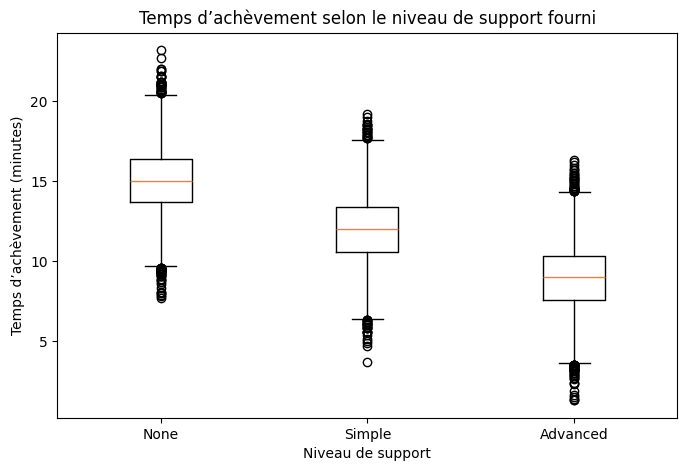

In [13]:
# Extraire les temps d'achèvement selon le niveau de support
completion_times = data['completionTimes']

# Préparer les données pour le boxplot
labels = list(completion_times.keys())
times = [completion_times[label] for label in labels]

# Tracer le boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(times, labels=labels)
plt.title("Temps d’achèvement selon le niveau de support fourni")
plt.xlabel("Niveau de support")
plt.ylabel("Temps d’achèvement (minutes)")
plt.show()

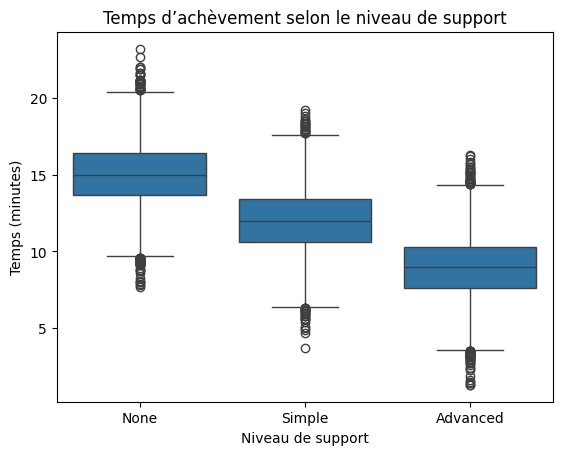

ANOVA - p-value: 0.0


In [14]:
# Préparer les données pour le boxplot
data = pd.DataFrame({
    "Temps": completion_times["None"] + completion_times["Simple"] + completion_times["Advanced"],
    "Support": (["None"] * len(completion_times["None"]) +
                ["Simple"] * len(completion_times["Simple"]) +
                ["Advanced"] * len(completion_times["Advanced"]))
})

# Boxplot
sns.boxplot(x="Support", y="Temps", data=data)
plt.title("Temps d’achèvement selon le niveau de support")
plt.ylabel("Temps (minutes)")
plt.xlabel("Niveau de support")
plt.show()

# Test ANOVA
f_stat, p_val = f_oneway(completion_times["None"], completion_times["Simple"], completion_times["Advanced"])
print("ANOVA - p-value:", p_val)

# 📊 Impact du niveau de support sur les temps d’achèvement

## ✅ Résumé de l’analyse

### 1. Influence du support sur les performances

- Le **temps d’achèvement** des exercices diminue avec le **niveau de support fourni** :
  - **Aucun support** : ~15 minutes, forte variabilité, nombreux retards.
  - **Support simple** : ~12 minutes, variabilité modérée.
  - **Support avancé** : ~9-10 minutes, performance homogène et efficace.

📉 **Plus le support est structuré, plus l’apprenant est autonome et rapide.**

---

### 2. Pourquoi c’est important ?

#### 🎓 Pédagogie
- Réduction du **temps de complétion** = meilleure compréhension et motivation.
- Moins de **frustration** et plus d’**autonomie**.

#### 💰 Économie
- Les tutoriels avancés sont **coûteux à produire**.
- Il faut mesurer s’ils sont **rentables** : 
  - Temps gagné × nombre d’utilisateurs × coût horaire.
  - Moins de besoin en support humain.

---

### 3. Exemple de rentabilité

- Coût de production d’un tutoriel : **2000 €**
- Temps économisé : **5 minutes par utilisateur**
- Pour **1000 utilisateurs** : 
  - Temps total gagné = 5000 minutes (~83 heures)
  - Économie estimée = **2083 €** (si 25 €/h)

✅ **Tutoriel rentable dès les 1000 premiers utilisateurs.**

---

### 📌 Conclusion

Le niveau de support a un **impact mesurable** sur la performance.  
➡️ Investir dans du support avancé est **justifiable** si l’on mesure son effet sur :
- la **réduction du temps d’apprentissage**,
- la **diminution du besoin en assistance humaine**,
- et la **satisfaction des apprenants**.

